# Algorithmes de tri par sélection et par insertion

**Trier** une collection indexée de données $A$ signifie *permuter* ses éléments de façon qu'on ait, pour tous index $i$ et $j$ valides: 

$$i< j\implies A[i]\leqslant A[j]\qquad\text{ou}\qquad i<j\implies A[i]\geqslant A[j]$$

selon que $A$ est trié dans l'ordre **croissant** (*ascendent*) ou dans l'ordre **décroissant** (*descendent*). 

*Exemple*: Si $A=14,23,5,11,22,26$ alors, après tri dans l'ordre croisant, $A=5,11,14,22,23,26$

Bien sûr, encore faut-il que les objets $A[i]$ et $A[j]$ soit *comparables* et cela ne va pas toujours de soi: souvent les objets sont comparés par l'intermédiaire d'une ou de plusieurs **clé(s)**.

Ici, par simplicité, nous supposerons simplement que nos objets sont des *entiers* et que «trier» signifie précisément *trier dans l'ordre croissant*. Si ces conditions ne sont pas réunies, il suffira alors d'adapter l'algorithme comme vu précédemment. 

Bien que trier une collection de données puisse paraître ennuyeux, le besoin impérieux de fouiller de grandes masses de données (plusieurs millions voir milliards) rend ce problème incontournable voir central dans bien des cas: nous avons déjà vu que la *recherche d'un élément dans une collection non ordonnée* **est beaucoup, beaucoup plus longue** qu'une *recherche dichotomique* qui s'appuie sur le fait que la collection est triée...

## Tri par sélection

<a href="https://vimeo.com/429772628">Vidéo d'accompagnement</a>

On part d'un tableau $A[1..n]$. L'idée est de:
1. **sélectionner** le *minimum* de $A[1..n]$ puis l'*échanger* avec $A[1]$,
2. recommencer la même chose avec le sous-tableau $A[2..n]$: sélectionner son minimum et l'échanger avec $A[2]$,
3. recommencer avec $A[3..n]$ ... 

Voici un exemple pour une itération:

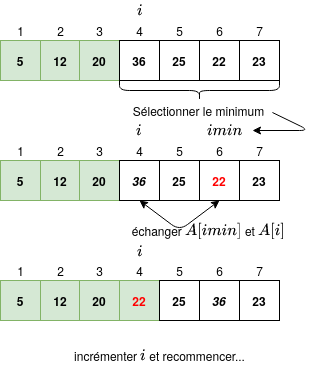

### «Pseudo-code» de `Tri-Selection`

**Donnée** un tableau $A$ non vide d'entier.

**Problème**: modifier l'ordre de ses éléments de façon que $A$ soit trié dans l'ordre croissant.

<pre><strong>Tri-Selection</strong>(A):
    n ← longueur(A)
    <strong>Pour</strong> i de 1 à n-1:
        imin ← <strong>Minimum</strong>(A,i,n) ⊳ Renvoie l'index du minimum de A[i..n]
        échanger A[i] et A[imin]
</pre>

#### Exercice 1

1. Détailler les différentes étapes de l'algorithme sur le tableau $A = 3,4,1,7,2$

2. L'algorithme est-il encore correct si on remplace `n-1` par `n` dans la boucle Pour?
__________

**1.**
    
    itération 1: A = 1, 4, 3, 7, 2
    itération 2: A = 1, 2, 3, 7, 4
    itération 3: A = 1, 2, 3, 7, 4
    itération 4: A = 1, 2, 3, 4, 7

**2.** **Oui**: dans ce cas, à la dernière itération, on cherche le minimum d'un sous-tableau de taille 1. Comme la réponse est clairement que son minimum est son seul élément et qu'ensuite on l'échange avec lui-même, on s'aperçoit que cette étape, bien que correcte, est inutile.

#### Exercice 2

Réécrire cet algorithme en remplaçant `Minimum` par le code correspondant puis l'implémenter en Python. Vérifier alors son bon fonctionnement avec:

```python
tab = [5, 12, 20, 36, 25, 22, 23]
tri_insertion(tab)
assert tab == [5, 12, 20, 22, 23, 25, 36]
```
____________

Il suffit d'utiliser l'algorithme de recherche du minimum et de l'adapter au contexte:

<pre><strong>Tri-Selection</strong>(A):
    n ← longueur(A)
    <strong>Pour</strong> i de 1 à n-1:
        ⊳ début recherche du min
        imin ← i
        <strong>Pour</strong> j de i+1 à n:
            <strong>Si</strong> A[j] < A[imin]:
                imin ← j
        ⊳ fin recherche min
        échanger A[i] et A[imin]
</pre>



In [ ]:
def tri_insertion(A):
    "tri le tableau A en place (ne renvoie rien) dans l'ordre croissant"
    n = len(A)
    for i in range(n-1):
        imin = i
        for j in range(i+1, n):
            if A[j] < A[imin]:
                imin = j
        # échange dans le style de python
        A[imin], A[i] = A[i], A[imin]
        # échange dans le cas général:
        # tmp = A[imin]; A[imin] = A[i]; A[i] = tmp 
        
tab = [5, 12, 20, 36, 25, 22, 23]
tri_insertion(tab)
assert tab == [5, 12, 20, 22, 23, 25, 36]
# Pourquoi «assert tri_insertion(tab) == [5, 12, 20, 22, 23, 25, 36]» ne fonctionnerait pas?

### Efficacité

À la première itération, la recherche du minimum à un coût proportionnel à la taille du tableau $A[1..n]$ soit $n$.

À la seconde, la recherche du minimum a lieu dans $A[2..n]$ et aura un coût proportionnel à $n-1$, etc.

Ainsi, on peut estimer que le coût total en temps est proportionnel à:

$$n+(n-1)+\cdots+1=\dfrac{(n+1)n}{2}=\dfrac{n^2}{2}+\dfrac{n}{2}$$

Mais, lorsque $n$ est «grand», $n^2$ sera beaucoup, beaucoup plus grand que $n$. Par exemple si $n$ vaut mille alors $n^2$ vaut 1 million. Pour cette raison, on néglige $n$ dans le coût qui devient:$$\dfrac{n^2}{2}$$

Mais $\frac{1}{2}$ est un facteur constant, on peut donc dire que:
> le coût de cet algorithme (pour $n$ grand) est proportionnel à $n^2$ ce qu'on note $O(n^2)$.

<a href="https://www.toptal.com/developers/sorting-algorithms/selection-sort">Visualiser le tri par **sélection** \[*Selection sort*\]</a>

#### Exercice 3

En supposant que le **tri par sélection** prenne 2 secondes sur un tableau de longueur 10000, estimer le temps qu'il lui faudrait pour trier un tableau de longueur 1 million.
__________

$O(n^2)$ signifie que le temps $T$ est proportionnel au carré de la taille du tableau $n$ donc
$$T=k\cdot n^2 \qquad \text{où }k\text{ est le coefficient de proportionnalité}$$

Cherchons le coefficient de proportionnalité $k$: $$k\cdot  10000^2=2s\implies k=\dfrac{2}{(10^4)^2}=\dfrac{2}{10^8}$$

Appliquons $T=k\cdot n^2$ pour $n=10^6$ (un million): $$T=\dfrac{2}{10^8}\times (10^{6})^2=2\times \dfrac{10^{12}}{10^{8}}=2\times 10^4=20000$$

Donc il faudra $20000$ secondes soit **5 heures 33 minutes et 20 secondes**.

**Note**: Observer que le calcul est similaire à «une règle de trois» en utilisant la colonne des carrés de $n$:

$$\begin{array}{c|c|c}
\text{temps}&n&n^2\cr
\hline
\color{red}{2}&10^4&\color{red}{10^8}\cr
\hline
\color{red}{T}&10^6&\color{red}{10^{12}}
\end{array}\implies T=\dfrac{2\times 10^{12}}{10^8}$$

À titre indicatif, voici le calcul des heures, minutes et secondes en python:

In [ ]:
# Calcule du temps avec Python
n1, n2 = 10000, 1000000
m = 60 # en sec.
h = 60 * m # en sec.

T = 2 * n2**2 / n1**2
T = int(T) # car la division donne un flottant.
heure = T // h
minute = (T % h) // m
seconde = T % m 
print(f"{heure}h{minute}m{seconde}s")

### Invariant de boucle et correction de l'algorithme

Observer qu'avec cette stratégie, au début d'une itération d'indice $i$:
> le sous-tableau $A[1..(i-1)]$ est trié et tous ses éléments sont inférieurs ou égaux à ceux de $A[i..n]$.

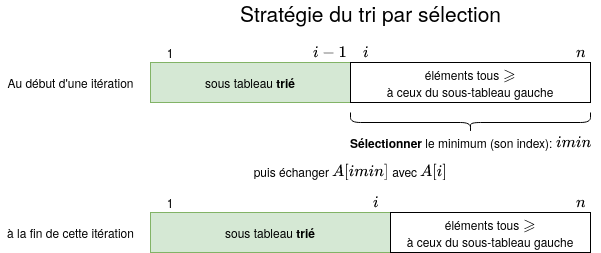

**Initialisation**: $i=1$ et donc $A[1..(i-1)]=A[1..0]=\emptyset$ est un sous-tableau vide: il est donc trivialement trié et tous ses éléments - *vu qu'il n'en a pas* - sont sont plus petits ou égaux à ceux $A[1..n]$ (car la condition est vide!).

**D'une itération à la suivante**: Si $i$ est l'indice de l'itération, l'hypothèse est que $A[1..(i-1)]$ est trié et tous ses éléments sont inférieurs ou égaux à ceux de $A[i..n]$.

Après les deux instructions de la boucle, $A[i]$ est inférieur ou égal à tous les éléments de $A[(i+1)..n]$ et il est aussi supérieur à tous ceux de $A[1..(i-1)]$ d'après l'hypothèse puisqu'il fait partie de $A[i..n]$. Donc $A[1..i]$ est clairement trié et tous ses éléments sont inférieures à ceux de $A[(i+1)..n]$ ce qui prouve l'invariant de boucle.

**Correction**: après la dernière itération, on a $i=(n-1)+1=n$ donc $A[1..(i-1)]=A[1..(n-1)]$ est trié et tous ses élément sont inférieurs à *celui* de $A[n..n]$ ce qui signifie clairement que $A[1..n]$ est trié!

## Tri par insertion

<a href="https://vimeo.com/430326154">Vidéo d'accompagnement</a>

Ce tri s'inspire de celui qu'utilise un joueur de cartes: Dans sa main gauche il tient les cartes qu'il a déjà triées. Il en prend une nouvelle et la compare de la droite vers la gauche avec celles qui sont déjà triées, puis il insère cette carte au moment où il tombe sur une carte plus petite: il la place juste après elle et cela a pour effet de décaler toutes les cartes supérieures d'une position vers la droite.

<img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Finterstices.info%2Fupload%2Fcomplexite-algo%2Ftri_par_insertion.jpg&f=1&nofb=1" />

**Supposons** disposer d'un sous-algorithme <code>Inserer(A,i)</code> qui, étant donné un tableau $A$ dont on suppose que $A[1..(i-1)]$ est trié (carte de la main gauche 4-5-10), insère - comme le joueur ci-dessus - l'élément $A[i]$ (carte 7) dans le sous-tableau $A[1..i]$ de façon qu'il soit trié.

#### «Pseudo code» de `Tri-Insertion`

**Donnée** un tableau $A$ non vide d'entier.

**Problème**: modifier l'ordre de ses éléments de façon que $A$ soit trié dans l'ordre croissant.

<pre><strong>Tri-Insertion</strong>(A):
    <strong>Pour</strong> i de 2 à n:
        <strong>Inserer</strong>(A,i)
</pre>

Simple ... non? Bien sûr, il faut encore préciser l'algorithme de <code>Inserer</code>... Nous le ferons un peu après.

#### Exercice 4

Détailler les différentes étapes de `Tri-Insertion` sur le tableau $A = 3, 4, 1, 7, 2$.
_________

                      tri insertion            tri sélection
                      -----------------        -----------------
    itération 1:      A = 3, 4, 1, 7, 2        A = 1, 4, 3, 7, 2
    itération 2:      A = 1, 3, 4, 7, 2        A = 1, 2, 3, 7, 4
    itération 3:      A = 1, 3, 4, 7, 2        A = 1, 2, 3, 7, 4
    itération 4:      A = 1, 2, 3, 4, 7        A = 1, 2, 3, 4, 7 

La boucle **Pour** a l'invariant:

> au début de l'itération $i$, le tableau $A[1..(i-1)]$ est trié.

#### Exercice 5

1. En admettant l'invariant de boucle, prouver que l'algorithme est correct.

2. Prouver cet invariant en deux étapes: 
    - Il est vrai au début de la première itération - **initialisation**
    - S'il est vrai au début d'une itération, il est vrai au début de la suivante - **D'une itération à la suivante**
____

**1. Correction de l'algorithme**: à la fin de la dernière itération $i=n+1$ (raison pour laquelle la boucle s'arrête!) et, d'après l'invariant de boucle, $A[1..(i-1)]=A[1..n]$ est trié: c'est précisément ce qu'on voulait.

**Initialisation**: Au début de la première itération, $i=2$ et le sous-tableau $A[1..(i-1)]=A[1..1]$ ne contient qu'un élément: il est donc «bêtement» trié!

**D'une itération à la suivante**: nous supposons que $A[1..(i-1)]$ est trié ce qui est précisément la condition de bon fonctionnement de `Inserer`. Une fois qu'`Inserer` a fait son travail - on est au début de l'itération suivante - $A[1..i]$ est trié.

Cela démontre l'invariant de boucle.

### Sous-algorithme `Inserer`

Penser aux cartes à jouer qui représentent les éléments du tableau $A$: 
1. vous prenez $A[i]$, la carte n° $i$; les cartes $A[1],A[2],..,A[i-1]$ sont déjà triées,
2. vous la comparez avec celle située le plus à droite $A[i-1]$ des cartes déjà triées,
3. **si** $A[i]$ est plus grande, vous la placer tout à droite: donc elle conserve le numéro $i$,
4. **sinon**: elle doit s'insérer parmi les cartes $A[1], A[2], ...,A[i-2]$ et la carte $A[i-1]$ devient la carte n°$i$ (pour laisser de la place) ... vous **recommencer donc à l'étape 2**. avec $A[i-2]$ cette fois...

Voici un exemple concret pour comprendre la stratégie de cet algorithme.

<p style="text-align:center">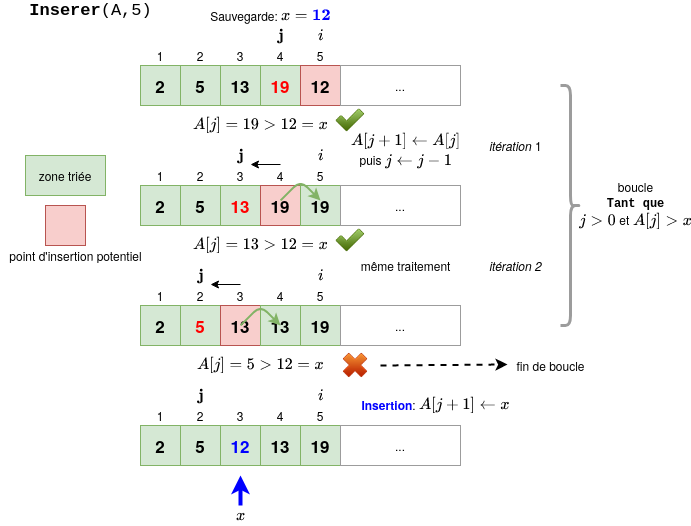</p>

#### Exercice 6

Illustrer simplement les étapes de l'insertion «à gauche» du dernier élément de $A = 1, 4, 5, 9, 2$.
_____

<pre>début: 2 est mémorisé 
itération 1: A = 1, 4, 5, <span style="color: red"/>9</span>, 9
itération 2: A = 1, 4, <span style="color: red"/>5</span>, 5, 9
itération 3: A = 1, <span style="color: red"/>4</span>, 4, 5, 9
fin -> 2 remplace le nombre en rouge.
</pre>

### «Pseudo code» du sous-algorithme `Inserer`

*Précondition*: $A[1..(i-1)]$ est trié dans l'ordre croissant et $A[i]$ existe.

*Résultat*: le sous-tableau $A[1..i]$ est trié.

<pre><strong>Inserer</strong>(A, i):
1    x ← A[i]
2    j ← i - 1
3    <strong>Tant que</strong> j > 0 <strong>et</strong> A[j] > x:
4        A[j+1] ← A[j]
5        j ← j - 1
     ⊳ Fin Tant Que
6    A[j+1] ← x
</pre>

Hum ... ça paraît moins simple que l'insertion d'une carte ... un ordinateur est comme un tout «petit enfant»: il faut tout lui expliquer. Voici une vue d'ensemble sur deux cas possibles:

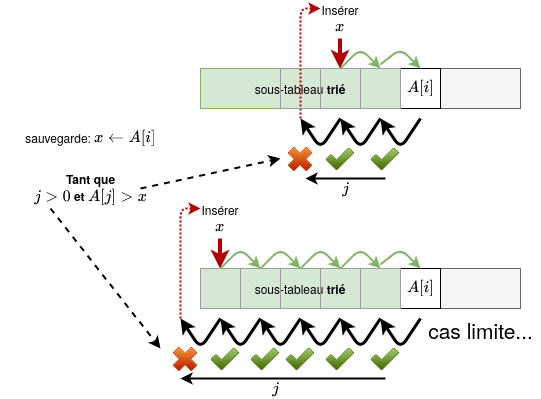

**Note**: Observer que $j$ n'est pas la position d'insertion mais celle de l'élément qu'on compare à $x$. Lorsque cet élément est plus petit que $x$, la boucle s'arrête et on l'insère à sa droite c'est-à-dire à la position $j+1$.

#### Exercice 7

Implémenter le **tri par insertion** en Python puis tester le sur `tab = [3, 4, 1, 7, 2]`.
____

In [ ]:
def tri_insertion(A):
    n = len(A)
    for i in range(1, n):
        x = A[i]
        j = i - 1
        while j >= 0 and A[j] > x: # ou j > -1 ...
            A[j+1] = A[j]
            j -= 1
        A[j+1] = x
        
tab = [3, 4, 1, 7, 2]
tri_insertion(tab)
assert tab == [1, 2, 3, 4, 7]

### Efficacité

Le **cas le plus défavorable** se produit lorsque $A$ est trié dans l'ordre *décroissant* (cas où la «carte» à insérer est toujours plus petite que toutes celles déjà triées). En effet, dans ce cas la boucle d'insertion s'arrête lorsque la condition de boucle - $j>0$ - devient fausse (revoir le deuxième cas de la vue d'ensemble de l'algorithme): le nombre d'itération de la boucle est alors $i$ (variable de la boucle externe **Pour**)

Ainsi, pour chaque itération de la boucle **Pour** de variable $i$ , `inserer` produit $i$ itérations. Cela donne un coût total: $$2+3+\cdots + n\approx \dfrac{n(n+1)}{2}$$

C'est la même formule que pour le tri par sélection et nous savons déjà que cela signifie que l'algorithme est $O(n^2)$:
> Dans **le cas le plus défavorable**, le temps d'exécution du **tri par insertion** est proportionnel au carré de la taille $n$ du tableau d'entrée.

<a href="https://www.toptal.com/developers/sorting-algorithms/insertion-sort">Visualiser le tri par **insertion** \[*Insertion sort*\]</a>

### Invariant de boucle et correction

La boucle de `Inserer` a l'invariant suivant:
> $A_g=A[1..j]$ et $A_d=A[(j+2)..i]$ sont triés et $A_g\leqslant A_d$ (tous les éléments de $A_g$ sont inférieurs ou égaux à tous ceux de $A_d$) et $x<A_d$ (...).

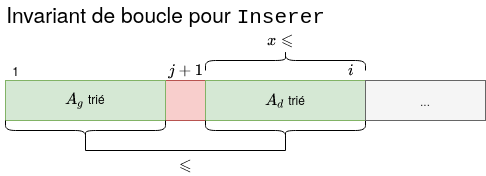

Cet invariant n'est pas très agréable du fait qu'il contient quatre conditions. Supposons pour l'instant qu'il est vrai et montrons comment il permet de prouver la correction de cet algorithme.

**Preuve de la correction**: Si la boucle se termine, c'est que soit $j\leqslant 0$ soit $A[j]\leqslant x$:
- $\underline{j\leqslant 0}$: ce n'est possible que si $j=0$ car $j$ est décrémenté d'une unité à chaque itération. L'invariant de boucle donne ici $A[(j+2)..i]=A[2..i]$ est trié et $x<A[2..i]$. Alors l'affectation (ligne 6) $A[j+1]=A[1]\leftarrow x$ nous assure que $A[1..i]$ est trié.

- $\underline{A[j]\leqslant x}$: l'invariant de boucle donne $A[1..j]$ et $A[(j+2)..i]$ sont triés et:
$$A[1..j]\leqslant A[j] \leqslant x<A[(j+2)..i]$$
  
  Clairement, l'affectation $A[j+1]\leftarrow x$ entraîne encore que $A[1..i]$ est trié.
___

Reste à prouver que l'invariant de boucle lui-même... Vous pouvez l'admettre ou travailler la démonstration (un peu délicate) donnée ci-après pour les plus courageux.

**Initialisation**: au démarrage $j=i-1$ et $A[1..j]=A[1..(i-1)]=A_g$ et $A[(j+2)..i]=A[(i+1)..i]=A_d=\emptyset$ sont triés: le premier car c'est la «pré-condition» de fonctionnement de `Inserer` et le second parcequ'il est vide. Du fait que $A_d$ est vide, les autres conditions sont satisfaites car il n'y a rien à satisfaire...

**D'une itération à la suivante**: Donc on suppose que l'invariant de boucle est vrai au début de l'itération courante. On a donc 
$$j>0\qquad \text{et}\qquad A[j] > x\qquad \text{(condition de boucle)}$$. 
On doit vérifier que, *après que les lignes 4 et 5 ont été exécutées* (donc $j$ a été remplacé par $j-1$): 

$$A'_g=A[1..(j-1)]\text{ et }A'_d=A[(j+1)..i]\text{ sont triés et}\\ A'_g\leqslant A'_d\text{ et } x<A'_d$$

Avant de démontrer les quatres affirmations de l'invariant de boucle, il est bon de noter quelques points:
- $A[j+1]=A[j]$ d'après la ligne 4.
- $A'_d=A[j+1]+A_d$ (concaténation) et donc $A'_d=A[j]+A_d$ d'après le point précédent.

Démonstration des quatres affirmations de l'invariant de boucle:

1. $A'_g=A[1..(j-1)]$ **est trié** soit parce qu'il est vide ($j=1$) soit comme sous-tableau de $A_g=A'_g+A[j-1]$ qui est trié par hypothèse.

2. $A'_d=A[j]+A_d$ **est trié**. En effet, par hypothèse, $A_d$ est trié et $A[j]\in A_g\leqslant A_d$ par hypothèse.

3. $A'_g\leqslant A'_d$: En effet, du fait que $A_g=A'_g+A[j]$:
$$\left\{\begin{array}{l}A_g \text{ trié}\implies A'_g\leqslant A[j]\cr
A_g \leqslant A_d \implies A[j]\leqslant A_d 
\end{array}\right.\implies A'_g\leqslant A'_d=A[j]+A_d$$

4. Comme $x<A_d$ (hyp.) et que $x<A[j]$ (condition de boucle) alors $x<A'_d$ puisque $A'_d=A[j]+A_d$.

L'invariant de boucle est donc prouvé (ouf!)

## Comparaison des tris par sélection et insertion

<a href="https://vimeo.com/430327363">Vidéo d'accompagnement</a>

Même si les deux algorithmes sont $O(n^2)$, l'insertion est plus économe que la séléction. En effet:

**Séléction**: Trouver le minimum nécessite de parcourir *systématiquement* tout le sous-tableau droit (même s'il est déjà trié!): dans tous les cas, la boucle de parcours va jusqu'au bout!

**Insertion**: La boucle d'insertion s'arrête dès que la position d'insertion est trouvée. très souvent, cela se produit bien avant d'avoir parcouru tout le sous-tableau. À l'extrême, si le tableau est déjà trié dans l'ordre croissant, la boucle d'insertion ne produit aucune itération.

> En pratique, **le tri par insertion est plus rapide que le tri par sélection**.

**Ce sont des tris «en place»**: Il faut observer que ces deux algorithmes ne **renvoient rien**: ils modifient directement le tableau fourni en argument - on dit qu'ils **trient «sur place»**. En python, la méthode de liste `list.sort()` trie sur place, tandis que la fonction prédéfinie `sorted(<liste>)` *renvoie une nouvelle liste triée* sans modifier celle qui est fournie en argument.

#### Peut-on faire mieux? - O(n log n)

Nous n'avons fait qu'effleurer le thème des algorithmes de tri; il en existe beaucoup d'autres: 
> **tri bulle** (voir exercice 8) \[ *bubble sort* \], **tri par tas** \[ *heap sort* \], **tri fusion** \[ *merge sort* \], **tri «rapide»** \[ *quicksort* \]... pour n'en citer que quelques uns.

<a href="https://www.toptal.com/developers/sorting-algorithms">Visualiser le fonctionnement de ces algorithmes</a>

Certains d'entre eux ont **une efficacité en $O(n\log n)$** - ceux utilisés par les fonctions «sort» de python par exemple. $O(n\log n)$ signifie que:

> leur temps d'exécution est proportionnel à $n\log n$ où $n$ est la taille de l'entrée.

**Rappel**: $\log n$ est approximativement égal à l'exposant $m$ de la puissance de $2$ voisine de $n$: 
$$\text{si }n=2^m\text{ alors }\log n=m \qquad(\text{ ou }\log 2^m=m)$$

Pour parvenir à cela, ils utilisent d'autres stratégies et notamment une technique appelée **récursivité** que vous découvrirez en Terminale.

#### Comprendre la différence entre O(n log n) et O(n^2)

Reprenons l'exemple de l'*exercice 3*.

Supposez qu'un algorithme en $O(n\log n)$ mette 2s pour trier un tableau de taille $10000=10^4$, pour un tableau de taille 1 million $=10^6$, il mettra **moins de** (règle de trois):

$$\begin{eqnarray}2\times \dfrac{10^6\log 10^6}{10^4\log 10^4}&\approx& 2\times 10^2\times \dfrac{20}{14}\cr &<& 200\times 2=400~\text{secondes}={\bf 6\text{m}40\text{s}}\end{eqnarray}$$

Pour mémoire, dans une situation similaire de l'exercice 3, avec un algorithme en $O(n^2)$, on obtenait un temps de **5 heures et demi** environ...

On peut faire le calcul précis avec Python qui montre qu'on a été «pessismiste» dans notre calcul:
```python
from math import log2
2 * (10**6 * log2(10**6))/(10**4 * log2(10**4)) # --> 300s = 5min!
```

Pour mémoire, **du plus rapide au moins rapide** (𝑛 la taille de l'entrée de l'algorithme): $$O(1) < O(\log n) < O(n) < O(n\log n) < O(n^2)$$
De plus, $O(\log n)$ est plus proche de $O(1)$ que de $O(n)$. De même, $O(n\log n)$ est plus proche de $O(n \log n)$ que de $O(n^2)$.

#### Exercice 8 - tri «bulle»

Le tri «bulle», à chaque itération $i$, parcours le sous-tableau $A[1..i]$ de gauche à droite et permute les éléments *consécutifs* s'ils ne sont pas dans l'ordre croissant. Il fait ce travail sur $A[1..n]$, puis sur $A[1..(n-1)]$, puis sur $A[1..(n-2)]$ etc. Voici un exemple de fonctionnement pour $A=1,4,3,2$:

$$\text{sur }A[1..4]:\qquad\underline{1,4},3,2~\rightarrow~ 1,\underline{\color{red}{4},\color{red}{3}},2\rightarrow 1,3,\underline{\color{red}{4},\color{red}{2}}~\rightarrow~1,3,2,{\bf 4}\\
\text{sur } A[1..3]:\qquad\underline{1,3},2,{\bf 4}~\rightarrow~1,\underline{\color{red}{3},\color{red}{2}},{\bf 4}~\rightarrow~1,2,{\bf 3}, {\bf 4}\\
\text{sur } A[1..2]:\qquad \underline{1,2},{\bf 3}, {\bf 4}~\rightarrow~1,{\bf 2},{\bf 3},{\bf 4}$$

1. Implémenter le tri bulle en Python.

2. Évaluer son efficacité.
________

In [ ]:
def tri_bulle(A):
    n = len(A)
    while n > 0:
        for j in range(n-1):
            if A[j] > A[j+1]:
                A[j], A[j+1] = A[j+1], A[j]
        n -= 1

from random import randint
test = [randint(1,100) for i in range(10)]
print(test)
tri_bulle(test)
print(test)

Son efficacité est $O(n^2)$ car la boucle externe parcourt (presque) toutes les positions $i$ du tableau en entrée et la boucle interne toutes celles du sous-tableau $A[1..i]$ comme pour le tri par sélection.